In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_src = r"E:\data\my data\November 2023 Kalman\Karlin KF tests November 2023\Experiment 5\320FPS 2X2\2023-11-04 12.03.52 vid\Allied Vision Technologies GS650 0001f61c\*tif"

In [3]:
og = OG.BasicOpticalGating()
og.sequence_manager.set_source(data_src)
og.run()

Setting source to E:\data\my data\November 2023 Kalman\Karlin KF tests November 2023\Experiment 5\320FPS 2X2\2023-11-04 12.03.52 vid\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
Getting SADs
Getting phases


In [28]:
print(og.sequence_manager.reference_period)

173.96058732612056


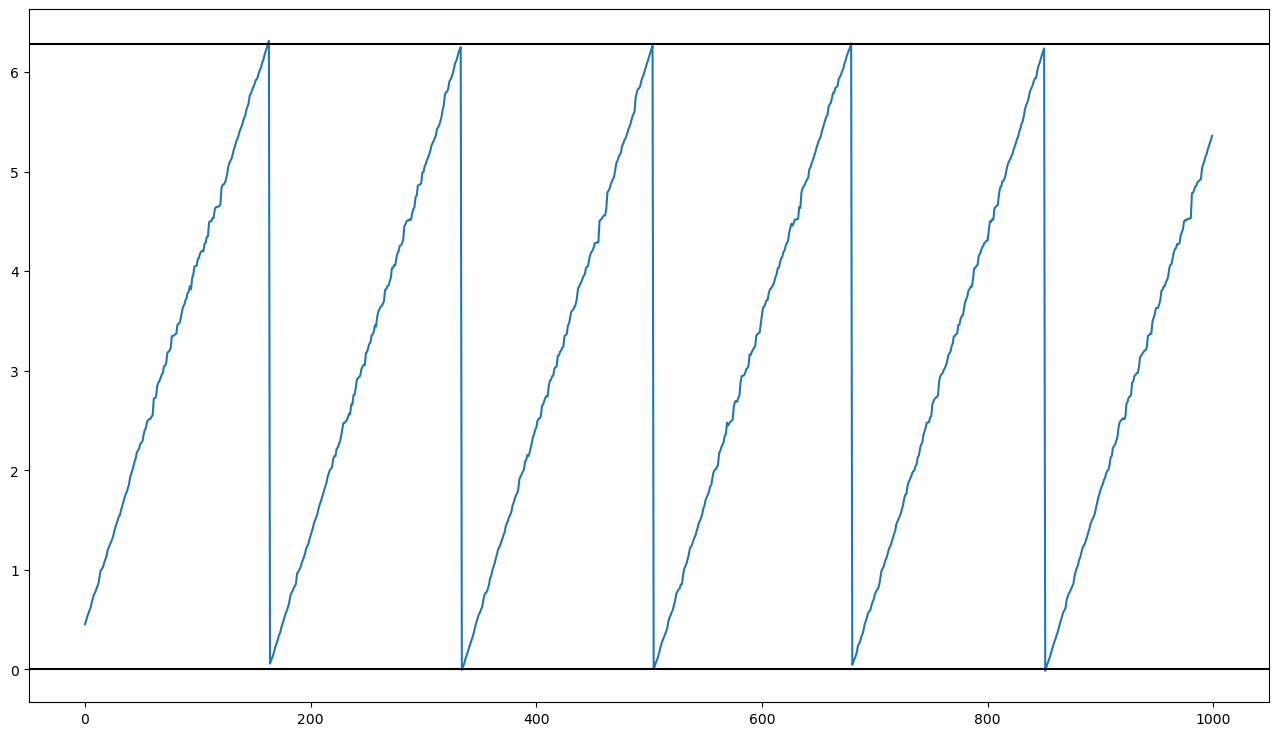

In [24]:
plt.figure(figsize = (16,9))
plt.plot(og.phases[1000:2000])
plt.axhline(0, c = "black")
plt.axhline(2 * np.pi, c = "black")

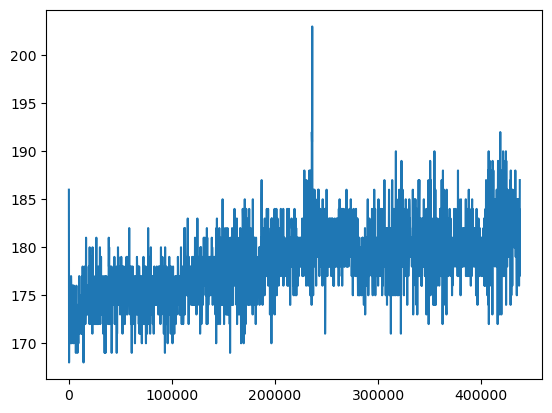

[110, 296, 464, 640, 814, 990, 1164, 1334, 1504, 1680, 1851, 2027, 2200, 2377, 2553, 2727, 2899, 3069, 3242, 3418, 3591, 3764, 3936, 4112, 4284, 4460, 4631, 4805, 4975, 5151, 5326, 5498, 5671, 5842, 6015, 6187, 6361, 6534, 6706, 6880, 7049, 7222, 7396, 7572, 7744, 7915, 8086, 8260, 8433, 8602, 8773, 8946, 9117, 9287, 9457, 9627, 9801, 9972, 10145, 10322, 10493, 10665, 10836, 11009, 11183, 11358, 11530, 11704, 11877, 12050, 12225, 12397, 12568, 12742, 12919, 13090, 13264, 13437, 13615, 13791, 13968, 14142, 14315, 14483, 14660, 14834, 15008, 15185, 15357, 15531, 15709, 15881, 16056, 16228, 16401, 16576, 16750, 16931, 17104, 17278, 17453, 17628, 17802, 17977, 18153, 18328, 18501, 18677, 18851, 19024, 19197, 19370, 19548, 19723, 19898, 20074, 20246, 20426, 20601, 20779, 20953, 21127, 21301, 21476, 21652, 21827, 21999, 22178, 22351, 22528, 22706, 22878, 23049, 23229, 23405, 23579, 23754, 23929, 24101, 24274, 24451, 24627, 24803, 24978, 25152, 25326, 25498, 25672, 25848, 26024, 26196, 26371,

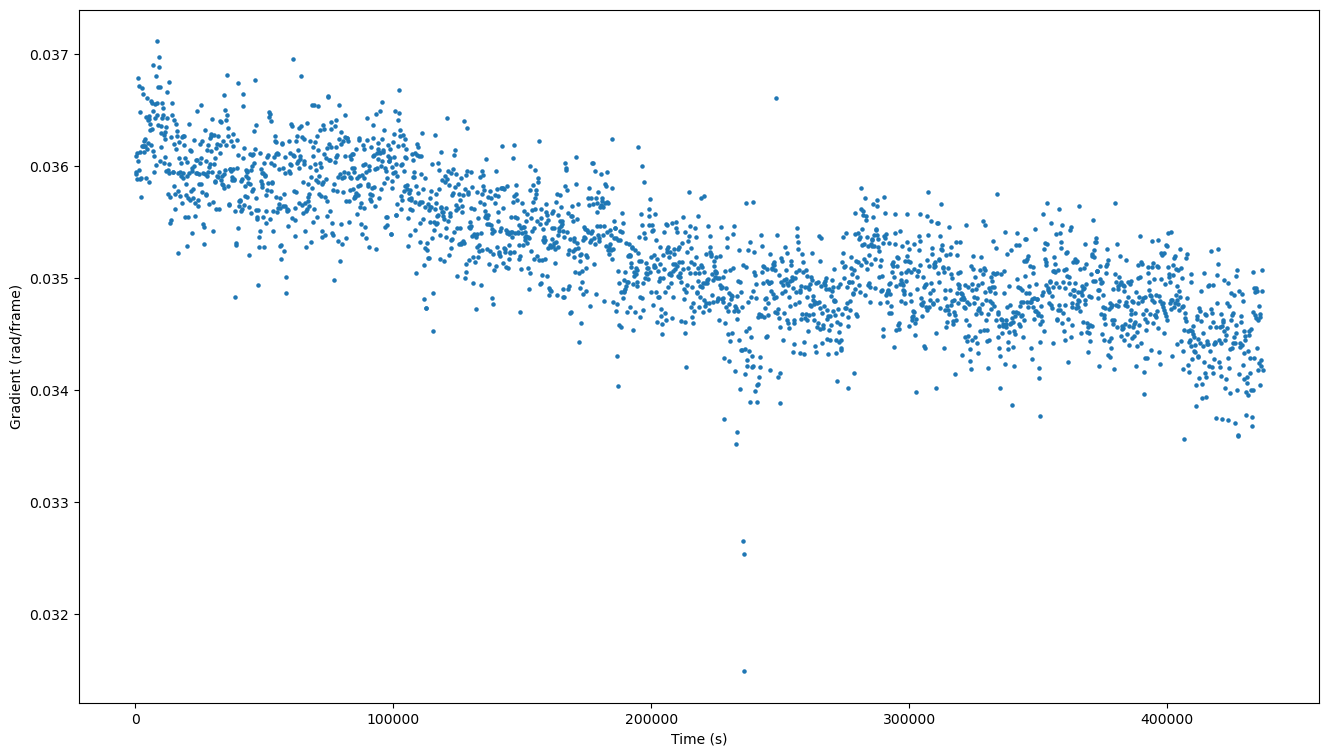

In [150]:
i_prev = 0
beat_indices = []
for i in range(1, og.phases.shape[0]):
    if (og.phases[i] - og.phases[i - 1]) < -np.pi:
        if abs(i_prev - i) > 7:
            beat_indices.append(i)
            i_prev = i

plt.plot(beat_indices[1::], np.diff(beat_indices))
plt.show()

print(beat_indices)
gradients = []
from scipy.optimize import curve_fit
for i in range(len(beat_indices) - 2):
    xs = range(beat_indices[i], beat_indices[i+2])
    ys = og.unwrapped_phases[beat_indices[i]:beat_indices[i+2]]
    popt, popc = curve_fit(lambda x, a, b: a * x + b, xs, ys)
    gradients.append(popt[0])

plt.figure(figsize = (16,9))
plt.scatter(np.array(beat_indices[:-2]), gradients, s = 5)
#plt.ylim(0.006, 0.011)
plt.xlabel("Time (s)")
plt.ylabel("Gradient (rad/frame)")
plt.show()

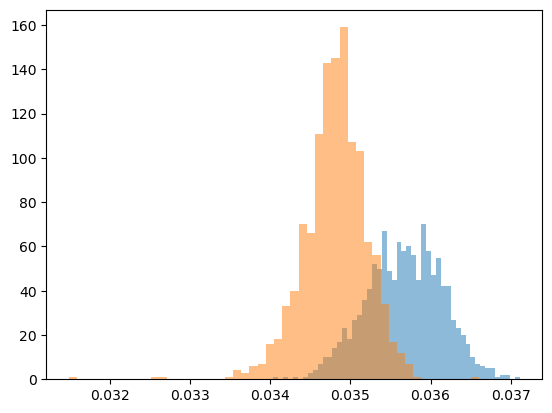

In [136]:
plt.hist(gradients[0:int(len(gradients)//2)], bins = 50, alpha = 0.5)
plt.hist(gradients[int(len(gradients)//2):-1], bins = 50, alpha = 0.5)
plt.show()

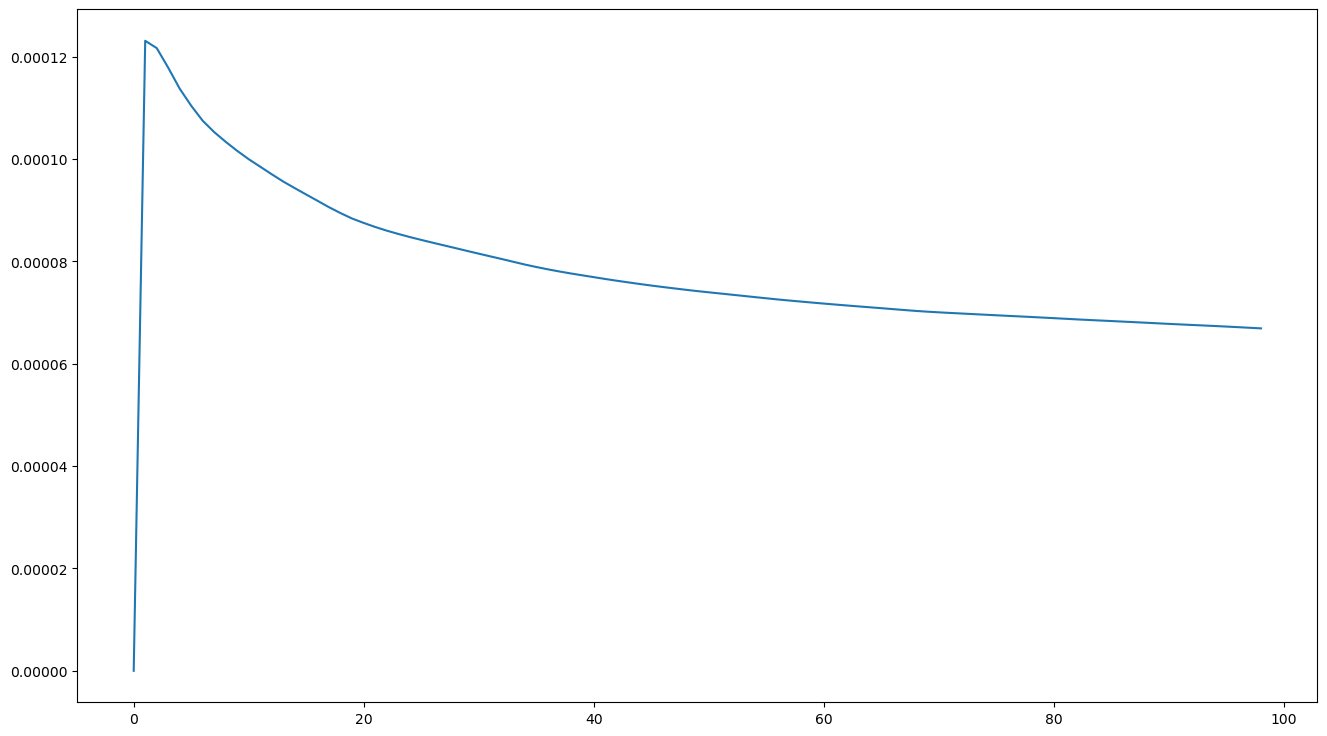

In [141]:
# Plot standard deviation for all possible time intervals up to 100 frames
plt.figure(figsize = (16,9))

stds = []
for i in range(1, 100):
    std = []
    for j in range(0, len(gradients) - i):
        std.append(np.std(gradients[j:j+i]))
    stds.append(np.std(std))
plt.plot(stds, label = str(i))


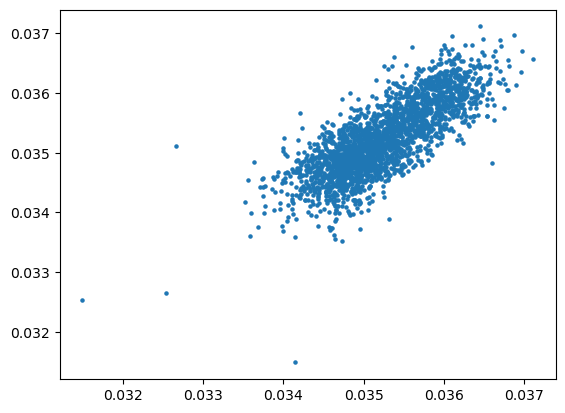

In [112]:
plt.scatter(gradients[1::], gradients[:-1], s = 5)
#plt.xlim(0, 0.04)
#plt.ylim(0, 0.04)
plt.show()

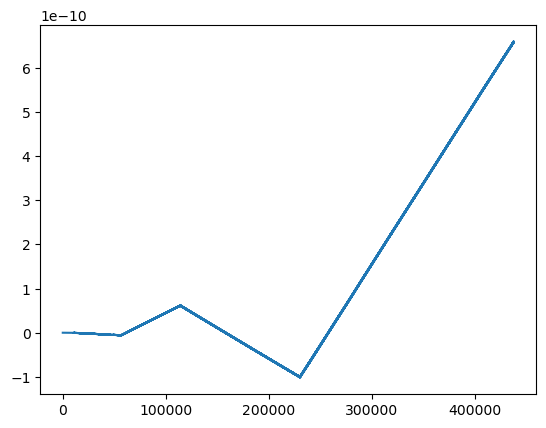

In [4]:
plt.plot(np.unwrap(og.unwrapped_phases % (2 * np.pi) - og.phases))

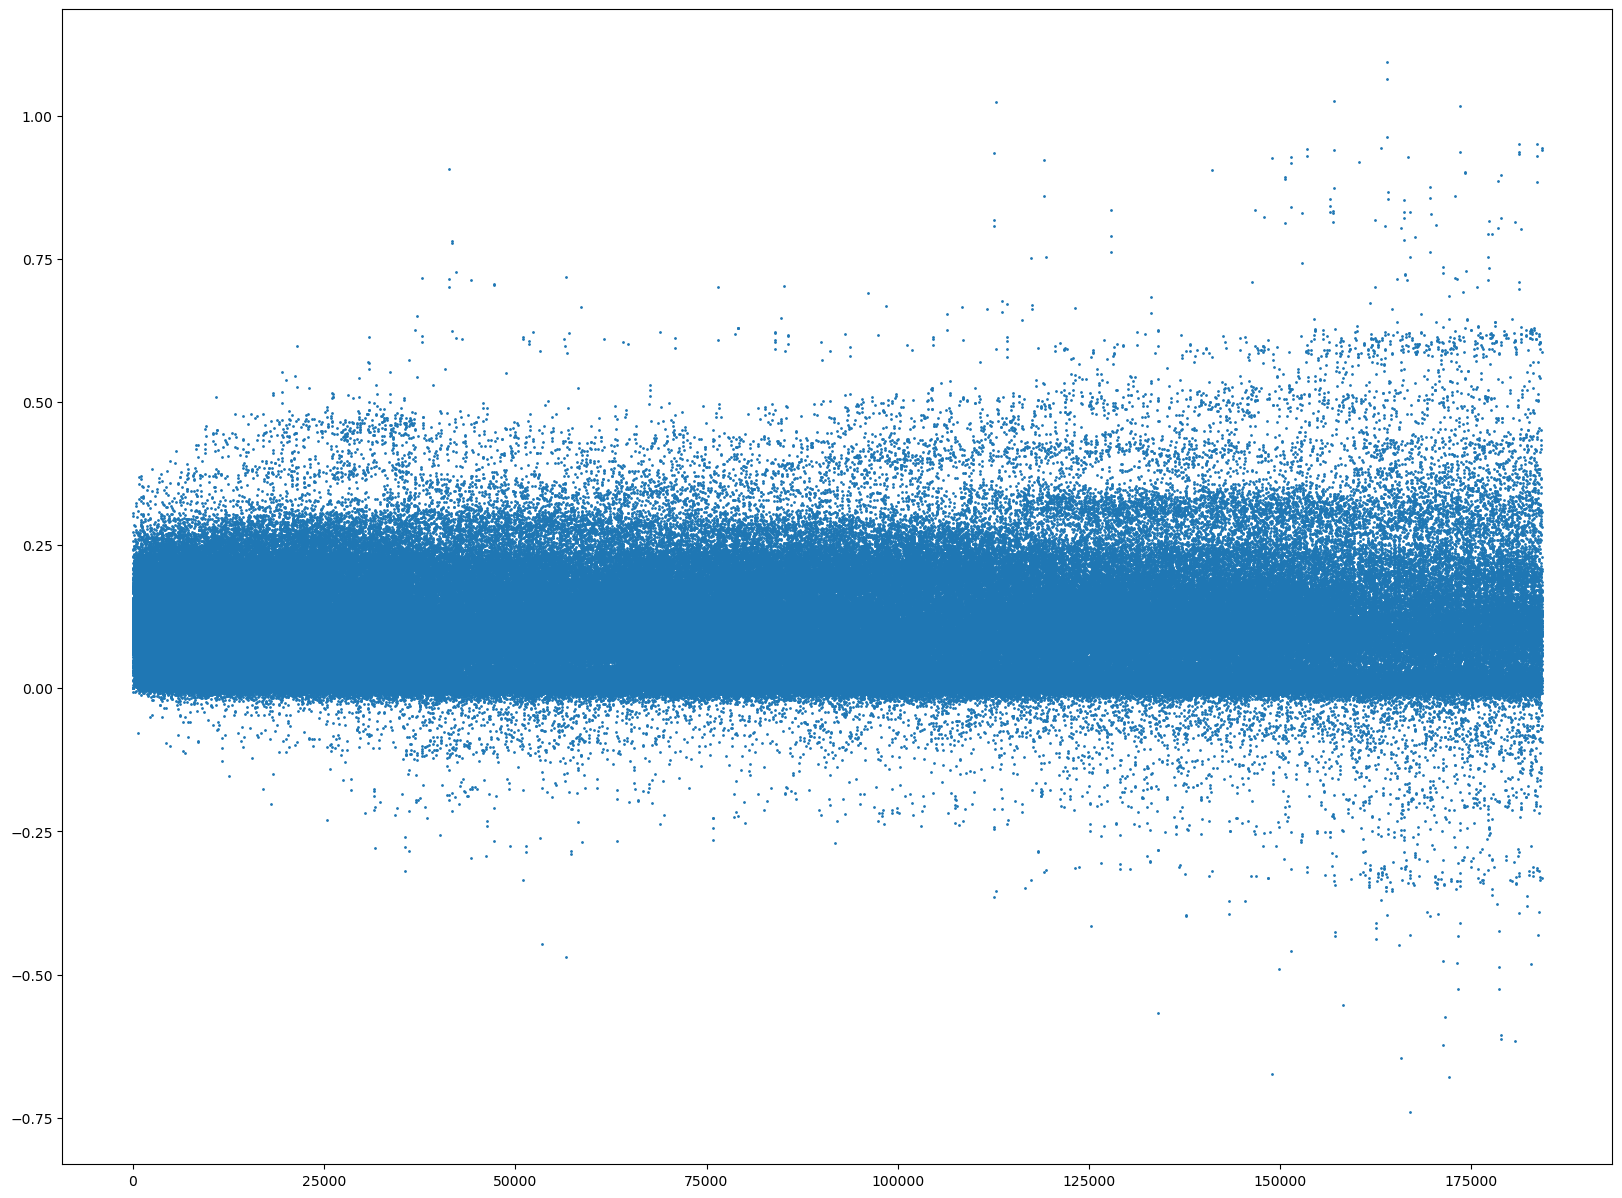

In [5]:
# Get moving average of delta phases
delta_phases_moving_average = np.convolve(og.delta_phases, np.ones(3)/3, mode = "same") * 3
phases_averaged = np.cumsum(np.unwrap(delta_phases_moving_average) % (2*np.pi))

plt.figure(figsize=(20,15))
plt.scatter(phases_averaged, delta_phases_moving_average, s=1)

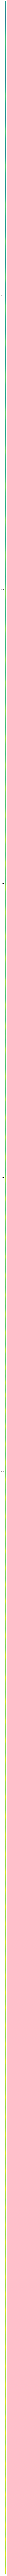

In [6]:
plt.figure(figsize=(30,400))
plt.imshow(og.sads)
plt.tight_layout()
plt.show()